<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/%E8%BC%95%E6%B2%B9%E6%A1%88nadda_36_1202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install catboost
from google.colab import drive
drive.mount('/content/drive')
import warnings;warnings.simplefilter('ignore')
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from catboost import CatBoostRegressor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load data

In [2]:
train_4521 = pd.read_csv('/content/drive/My Drive/台塑輕油案子/data/train_4521.csv',index_col=0)
test_170 = pd.read_csv('/content/drive/My Drive/台塑輕油案子/data/test_170.csv',index_col=0)
test_250 = pd.read_csv('/content/drive/My Drive/台塑輕油案子/data/test_250.csv',index_col=0)
test_200 = test_250.loc[test_250.index %5 != 0]
test_50 = test_250.loc[test_250.index %5 ==0].drop(95)
train = train_4521.append(test_170).append(test_200)
test = test_50
train.shape,test.shape

((4891, 27), (49, 27))

# clean data

In [0]:
def clean(df):
  return df.loc[df['N+A']>=36]

In [4]:
train = clean(train)
test = clean(test)
train.shape,test.shape

((2847, 27), (45, 27))

# scaler

In [5]:
cols = train.columns.tolist()
x_cols = cols[:4]
y_cols = cols[4:]
sc = StandardScaler()
train.loc[:,x_cols] = sc.fit_transform(train.loc[:,x_cols])
test.loc[:,x_cols] = sc.transform(test.loc[:,x_cols])
train.append(test).head()

,T10,T50,T90,N+A,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A
39,1.098378,0.864047,-0.135257,-1.557408,0.002,0.000,0.000,3.032,0.536,4.599,0.437,10.119,8.158,8.066,3.144,8.824,9.438,5.356,5.727,6.099,9.952,4.479,3.780,0.849,5.160,0.636,0.368
70,1.951309,2.244307,1.256639,-1.512666,0.139,0.067,0.030,1.655,0.864,1.434,0.272,6.580,4.713,5.622,3.304,9.068,9.336,6.021,7.713,7.156,12.958,6.091,4.367,1.753,7.137,0.938,1.088
71,1.987221,2.431217,1.275971,-1.463885,0.136,0.065,0.030,1.677,0.852,1.452,0.271,6.664,4.785,5.626,3.285,9.086,9.348,6.082,7.677,7.197,12.997,6.360,4.376,1.739,7.112,1.020,1.015
72,1.655028,1.985508,1.565949,-1.647357,0.366,0.227,0.043,2.104,0.989,1.771,0.305,7.723,5.726,6.251,3.193,9.063,9.453,6.081,6.863,6.898,12.019,5.742,4.164,1.423,6.630,0.831,0.769
92,1.170204,1.927998,1.353299,-1.549951,1.334,0.906,0.118,2.618,1.824,1.924,0.379,6.957,5.263,6.529,3.012,8.460,8.822,6.301,6.201,6.389,11.240,6.283,4.162,1.491,6.982,1.013,0.718


# fit and y_pred

In [0]:
model = CatBoostRegressor(learning_rate=0.1,n_estimators=100,verbose=False)
#model = SVR()

In [18]:
y_pred = pd.DataFrame(index=test.index,columns=y_cols)
for y_name in y_cols:
  model.fit(train[x_cols],train[y_name])
  y_pred[y_name] = model.predict(test[x_cols])
y_pred.head()

,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A
5,0.870409,0.602258,0.156949,1.357753,1.319798,5.421924,0.371123,6.545337,6.243806,18.783887,5.708903,6.134049,7.504745,10.238472,6.060105,2.949341,7.528056,5.232135,2.296209,0.467684,2.828097,0.607015,0.403004
10,0.933320,0.635871,0.077675,1.737631,1.493594,3.538403,0.346658,7.239634,7.476034,17.705904,5.300759,6.941247,10.729295,8.656378,6.060339,3.415713,7.820042,4.243599,2.171237,0.495067,2.450010,0.488326,0.448330
15,9.162535,6.616106,0.893840,6.668848,8.015762,7.878870,2.786925,6.239373,6.228739,11.057579,3.987788,4.596758,4.962510,5.161842,3.585689,2.142471,4.336591,2.139831,1.063322,0.482737,1.485973,0.218452,0.238094
20,11.402389,7.968611,1.104616,6.796127,8.039880,9.025126,3.363900,5.332171,4.926689,11.416270,4.296895,4.051333,4.036253,5.114593,3.630616,2.046287,3.195984,1.736312,1.138947,0.565205,1.226952,0.204300,0.268634
25,9.197480,7.910019,0.944140,5.676384,7.540912,6.735935,1.715210,4.937403,5.545602,10.320767,3.332323,4.300230,5.151680,4.971073,3.735929,2.715436,4.782887,2.859470,1.891369,1.309578,2.933785,0.480694,0.993090


# loss

In [0]:
from numpy import sqrt
se = (y_pred[y_cols]-test[y_cols])**2
mse = se.mean(axis=1)
rmse = sqrt(mse)
rmse = rmse.sort_values(ascending=False)

# plot

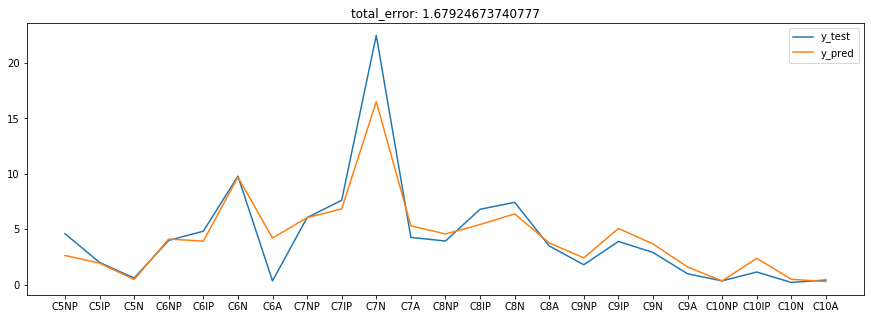

In [20]:
import matplotlib.pyplot as plt
for idx in rmse.index[:1]:
  fig = plt.figure(figsize=(15,5))
  plt.title('total_error: '+str(rmse[idx]))
  plt.plot(test.loc[idx,y_cols],label='y_test')
  plt.plot(y_pred.loc[idx,y_cols],label='y_pred')
  plt.legend()
  plt.show()

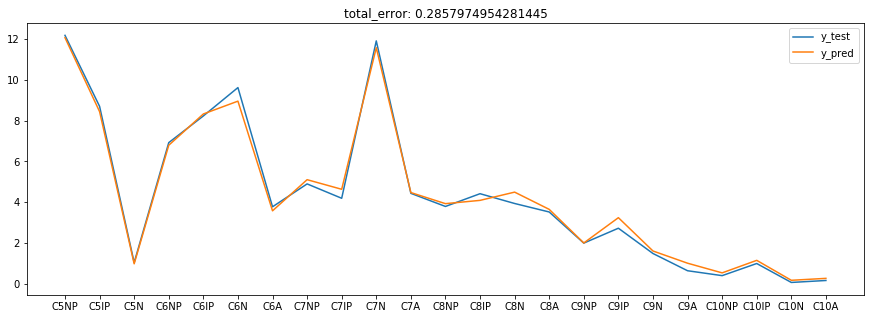

In [21]:
for idx in rmse.index[-1:]:
  fig = plt.figure(figsize=(15,5))
  plt.title('total_error: '+str(rmse[idx]))
  plt.plot(test.loc[idx,y_cols],label='y_test')
  plt.plot(y_pred.loc[idx,y_cols],label='y_pred')
  plt.legend()
  plt.show()